In [1]:
# -*- coding: utf-8
# Reinaldo Chaves (@paidatocandeira)
# Acessa o arquivo criado com pagamentos de empenho da covid19
# E faz diversas estatísticas
#

In [2]:
import pandas as pd

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
kwargs = {'sep': ',', 'dtype': str, 'encoding': 'utf-8'}
pagamentos_covid19 = pd.read_csv("resultados/pagamentos_covid19/pagamentos_feitos_de_empenhos_covid19_ate_17_setembro_2020.csv", **kwargs)

In [6]:
# Carrega nomes de colunas

In [7]:
list(pagamentos_covid19.columns.values.tolist())

['Id Empenho',
 'Código Empenho',
 'Código Empenho Resumido',
 'Data Emissão_x',
 'Código Tipo Documento_x',
 'Tipo Documento_x',
 'Tipo Empenho',
 'Espécie Empenho',
 'Código Órgão Superior_x',
 'Órgão Superior_x',
 'Código Órgão_x',
 'Órgão_x',
 'Código Unidade Gestora_x',
 'Unidade Gestora_x',
 'Código Gestão_x',
 'Gestão_x',
 'Código Favorecido_x',
 'Favorecido_x',
 'Observação_x',
 'Código Esfera Orçamentária',
 'Esfera Orçamentária',
 'Código Tipo Crédito',
 'Tipo Crédito',
 'Código Grupo Fonte Recurso',
 'Grupo Fonte Recurso',
 'Código Fonte Recurso',
 'Fonte Recurso',
 'Código Unidade Orçamentária',
 'Unidade Orçamentária',
 'Código Função',
 'Função',
 'Código SubFunção',
 'SubFunção',
 'Código Programa',
 'Programa',
 'Código Ação',
 'Ação',
 'Linguagem Cidadã',
 'Código Subtítulo (Localizador)',
 'Subtítulo (Localizador)',
 'Código Plano Orçamentário_x',
 'Plano Orçamentário_x',
 'Código Programa Governo_x',
 'Nome Programa Governo_x',
 'Autor Emenda',
 'Código Categoria de 

In [8]:
# Quantidade de favorecidos nos pagamentos

In [9]:
a = len(pagamentos_covid19['Favorecido_x'].value_counts())
a

7208

In [10]:
# Transforma em numero campos de valores

In [11]:
pagamentos_covid19['Valor Original do Empenho'] = pagamentos_covid19['Valor Original do Empenho'].str.replace(',','.')
pagamentos_covid19['Valor Original do Empenho'] = pagamentos_covid19['Valor Original do Empenho'].astype('float64') 

pagamentos_covid19['Valor do Empenho Convertido pra R$'] = pagamentos_covid19['Valor do Empenho Convertido pra R$'].str.replace(',','.')
pagamentos_covid19['Valor do Empenho Convertido pra R$'] = pagamentos_covid19['Valor do Empenho Convertido pra R$'].astype('float64') 

pagamentos_covid19['Valor Utilizado na Conversão_x'] = pagamentos_covid19['Valor Utilizado na Conversão_x'].str.replace(',','.')
pagamentos_covid19['Valor Utilizado na Conversão_x'] = pagamentos_covid19['Valor Utilizado na Conversão_x'].astype('float64') 

pagamentos_covid19['Valor Pago (R$)'] = pagamentos_covid19['Valor Pago (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Pago (R$)'] = pagamentos_covid19['Valor Pago (R$)'].astype('float64') 
pagamentos_covid19.rename(columns = {'Valor Pago (R$)':'valor_pago_em_real'},inplace = True)

pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'].astype('float64') 

pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'] = pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'] = pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'].astype('float64') 

pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'].astype('float64') 

pagamentos_covid19['Valor Original do Pagamento'] = pagamentos_covid19['Valor Original do Pagamento'].str.replace(',','.')
pagamentos_covid19['Valor Original do Pagamento'] = pagamentos_covid19['Valor Original do Pagamento'].astype('float64') 

pagamentos_covid19['Valor do Pagamento Convertido pra R$'] = pagamentos_covid19['Valor do Pagamento Convertido pra R$'].str.replace(',','.')
pagamentos_covid19['Valor do Pagamento Convertido pra R$'] = pagamentos_covid19['Valor do Pagamento Convertido pra R$'].astype('float64') 

pagamentos_covid19['Valor Utilizado na Conversão_y'] = pagamentos_covid19['Valor Utilizado na Conversão_y'].str.replace(',','.')
pagamentos_covid19['Valor Utilizado na Conversão_y'] = pagamentos_covid19['Valor Utilizado na Conversão_y'].astype('float64') 

In [12]:
pagamentos_covid19['valor_pago_em_real'].sum()

34090466884.109997

In [13]:
pagamentos_covid19['Valor Original do Empenho'].sum()

137004538195.56999

In [14]:
pagamentos_covid19['Valor do Empenho Convertido pra R$'].sum()

136328992420.18001

In [15]:
# Média de valores pagos

In [16]:
pagamentos_covid19['valor_pago_em_real'].mean()

469701.52363782906

In [17]:
# Mediana de valores pagos

In [18]:
pagamentos_covid19['valor_pago_em_real'].median()

13887.12

In [19]:
# Moda de valores pagos

In [20]:
pagamentos_covid19['valor_pago_em_real'].mode()

0   100,000.00
dtype: float64

In [21]:
procura = pagamentos_covid19[(pagamentos_covid19['valor_pago_em_real'] == 100000)]

In [22]:
procura.shape

(3487, 103)

In [23]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]].head(10)

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
947,28/07/2020,257001000012020NE848249,239600258,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
948,28/07/2020,257001000012020NE848240,230500228,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
953,28/07/2020,257001000012020NE848248,234100250,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
957,28/07/2020,257001000012020NE848239,235900250,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
983,28/07/2020,257001000012020NE848254,234700239,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
986,28/07/2020,257001000012020NE848263,243400304,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
987,28/07/2020,257001000012020NE848253,235500252,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
991,28/07/2020,257001000012020NE848255,243000230,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
992,28/07/2020,257001000012020NE848268,238900253,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica
993,28/07/2020,257001000012020NE848265,234800265,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"100,000.00","100,000.00",0.00,PARA ATENDER PORTARIA NRO 1666 DE 01/07/2020 -...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica


In [24]:
# Maior valor originalmente empenhado

In [25]:
pagamentos_covid19['Valor do Empenho Convertido pra R$'].max()

1353600005.0

In [26]:
pagamentos_covid19.loc[pagamentos_covid19['Valor do Empenho Convertido pra R$'].idxmax()][["Data Emissão_x", "Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y", "Modalidade de Licitação"]]

Data Emissão_x                                                                15/09/2020
Código Empenho                                                   254445252012020NE803058
Id Empenho                                                                     254300072
Órgão_x                                                            Fundação Oswaldo Cruz
Unidade Gestora_x                             INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS
Código Favorecido_x                                                            EX2544480
Favorecido_x                                                      ASTRAZENECA UK LIMITED
Valor do Empenho Convertido pra R$                                      1,353,600,005.00
valor_pago_em_real                                                        175,782,211.76
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                           IMPORTACAO DE SERVICOS DE PESQUISA, DESENVOLVI...
Observação_y         

In [27]:
# Menor valor originalmente empenhado

In [28]:
pagamentos_covid19['Valor do Empenho Convertido pra R$'].min()

1.0

In [29]:
pagamentos_covid19.loc[pagamentos_covid19['Valor do Empenho Convertido pra R$'].idxmin()][["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y", "Modalidade de Licitação"]]

Data Emissão_x                                                                27/05/2020
Código Empenho                                                   155001152752020NE523972
Id Empenho                                                                     180602675
Órgão_x                                             Hospital de Clínicas de Porto Alegre
Unidade Gestora_x                                   HOSPITAL DE CLINICAS DE PORTO ALEGRE
Código Favorecido_x                                                       06356085000121
Favorecido_x                            TECSS - TECNOLOGIA A SERVICO DA SAUDE LTDA - EPP
Valor do Empenho Convertido pra R$                                                  1.00
valor_pago_em_real                                                                112.29
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                                                  MATERIAL MEDICO HOSPITALAR
Observação_y         

In [30]:
# Maior valor pago em real 

In [31]:
pagamentos_covid19['valor_pago_em_real'].max()

991512000.0

In [32]:
pagamentos_covid19.loc[pagamentos_covid19['valor_pago_em_real'].idxmax()][["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

Data Emissão_x                                                                15/09/2020
Código Empenho                                                   254445252012020NE803058
Id Empenho                                                                     254300072
Órgão_x                                                            Fundação Oswaldo Cruz
Unidade Gestora_x                             INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS
Código Favorecido_x                                                            EX2544480
Favorecido_x                                                      ASTRAZENECA UK LIMITED
Valor do Empenho Convertido pra R$                                      1,353,600,005.00
valor_pago_em_real                                                        991,512,000.00
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                           IMPORTACAO DE SERVICOS DE PESQUISA, DESENVOLVI...
Observação_y         

In [33]:
# Menor valor pago em real 

In [34]:
pagamentos_covid19['valor_pago_em_real'].min()

-15725875.29

In [35]:
pagamentos_covid19.loc[pagamentos_covid19['valor_pago_em_real'].idxmin()][["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

Data Emissão_x                                                                28/07/2020
Código Empenho                                                   250006000012020NE000285
Id Empenho                                                                     233300270
Órgão_x                                    Ministério da Saúde - Unidades com vínculo di
Unidade Gestora_x                                 COORDENACAO-GERAL DE GESTAO DE PESSOAS
Código Favorecido_x                                                               250006
Favorecido_x                                      COORDENACAO-GERAL DE GESTAO DE PESSOAS
Valor do Empenho Convertido pra R$                                         64,585,000.00
valor_pago_em_real                                                        -15,725,875.29
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                           ATENDER DESPESAS COM PAGAMENTO DE BOLSAS DO PR...
Observação_y         

In [36]:
# Agrupa a soma de valores pagos em Código Empenho+Id Empenho 

In [37]:
pagamentos_covid19.groupby(["Código Empenho", "Id Empenho"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

,Código Empenho,Id Empenho,valor_pago_em_real
15542,254445252012020NE803058,254300072,"1,284,023,632.94"
15112,250005000012020NE000096,176600022,"694,320,000.00"
15940,257001000012020NE810544,174800424,"440,894,813.73"
15779,257001000012020NE453964,177001678,"415,121,875.00"
15925,257001000012020NE810529,178400461,"360,266,482.23"
...,...,...,...
14885,240076000012020NE000338,202800038,-54.69
14947,240230000012020NE000216,243900086,-80.63
14796,240017000012020NE006844,243800153,-433.84
14664,240017000012020NE003889,177700824,-556.20


In [38]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Empenho'] == '257001000012020NE810544') & (pagamentos_covid19['Id Empenho'] == '174800424')]

In [38]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
13900,09/04/2020,257001000012020NE810544,174800424,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"440,894,813.73","440,894,813.73",0.00,CORONAVIRUS (COVID-19)MUNICIPAL_PARCELA_UNICA_...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica


In [41]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Empenho'] == '254445252012020NE803058') & (pagamentos_covid19['Id Empenho'] == '254300072')]

In [42]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
64038,15/09/2020,254445252012020NE803058,254300072,Fundação Oswaldo Cruz,INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS,EX2544480,ASTRAZENECA UK LIMITED,"1,353,600,005.00","175,782,211.76",0.00,"IMPORTACAO DE SERVICOS DE PESQUISA, DESENVOLVI...",LIQUIDACAO REF. A CONTRATACAO DE SERVICO DE PE...,Dispensa de Licitação
64039,15/09/2020,254445252012020NE803058,254300072,Fundação Oswaldo Cruz,INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS,EX2544480,ASTRAZENECA UK LIMITED,"1,353,600,005.00","116,729,421.18",0.00,"IMPORTACAO DE SERVICOS DE PESQUISA, DESENVOLVI...",LIQUIDACAO REF. A CONTRATACAO DE SERVICO DE PE...,Dispensa de Licitação
64040,15/09/2020,254445252012020NE803058,254300072,Fundação Oswaldo Cruz,INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS,EX2544480,ASTRAZENECA UK LIMITED,"1,353,600,005.00","991,512,000.00",0.00,"IMPORTACAO DE SERVICOS DE PESQUISA, DESENVOLVI...",LIQUIDACAO REF. A CONTRATACAO DE SERVICO DE PE...,Dispensa de Licitação


In [43]:
# Agrupa a soma de valores pagos em Unidade Gestora - 20 primeiros

In [44]:
pagamentos_covid19.groupby(["Unidade Gestora_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Unidade Gestora_x,valor_pago_em_real
456,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"26,326,880,931.94"
578,FUNDO NACIONAL DE ASSISTENCIA SOCIAL,"2,500,148,343.31"
813,INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS,"1,494,578,698.60"
447,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,"1,491,203,360.10"
573,FUNDAÇÃO OSWALDO CRUZ,"310,611,603.56"
399,COORDENACAO-GERAL DE GESTAO DE PESSOAS,"281,518,531.82"
849,SECR. DE GESTAO DO TRAB. E DA EDUC. NA SAUDE,"192,207,418.00"
577,FUNDO NAC.DE DESENV. CIENTIFICO E TECNOLOGICO,"103,047,310.27"
401,COORDENAÇÃO GERAL DE INFRAESTRUTURA DOS CAMPI,"85,679,614.19"
579,FUNDO NACIONAL DE SEGURANÇA PÚBLICA - FNSP,"83,910,105.85"


In [45]:
# Salva em CSV para gráfico

In [46]:
salva = pagamentos_covid19.groupby(["Unidade Gestora_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

In [49]:
salva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 456 to 348
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unidade Gestora_x   971 non-null    object 
 1   valor_pago_em_real  971 non-null    float64
dtypes: float64(1), object(1)
memory usage: 22.8+ KB


In [50]:
salva.to_csv('resultados/graficos/soma_ordenada_unidade_gestora_pagamentos_feitos_de_empenhos_covid19_ate_17_setembro_2020.csv', index=False)

In [ ]:
# Detalha DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE

In [53]:
procura = pagamentos_covid19[(pagamentos_covid19['Unidade Gestora_x'] == 'DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE') ]
procura.groupby(["Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,valor_pago_em_real
0,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"23,591,408,795.29"
17,FUNDO ESTADUAL DE SAUDE,"584,769,872.00"
796,ORGANIZACAO PAN-AMERICANA DA SAUDE/ORGANIZACAO...,"451,471,585.65"
38,FUNDO MUNICIPAL DE SAUDE,"370,483,670.00"
19,FUNDO ESTADUAL DE SAUDE - FUNDES,"211,060,593.00"
21,FUNDO ESTADUAL DE SAUDE DO ESTADO DA BAHIA,"95,366,269.00"
7,FUNDO DE SAUDE DO DISTRITO FEDERAL,"77,565,704.00"
45,FUNDO MUNICIPAL DE SAUDE - FMS,"70,491,675.00"
20,FUNDO ESTADUAL DE SAUDE DE PERNAMBUCO,"58,757,172.00"
261,FUNDO MUNICIPAL DE SAUDE DE DUQUE DE CAXIAS,"48,737,165.00"


In [54]:
# Detalha DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG

In [55]:
procura = pagamentos_covid19[(pagamentos_covid19['Unidade Gestora_x'] == 'DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG') ]
procura.groupby(["Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,valor_pago_em_real
8,GLOBAL BASE DEVELOPMENT HK LIMITED,"708,226,249.50"
10,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00"
20,MAGNAMED TECNOLOGIA MEDICA S/A,"229,299,270.00"
14,LEISTUNG EQUIPAMENTOS LTDA.,"66,037,000.00"
13,"KTK INDUSTRIA, IMPORTACAO, EXPORTACAO E COMERC...","52,507,920.00"
5,DESCARPACK DESCARTAVEIS DO BRASIL LTDA,"30,544,000.00"
36,WEG DRIVES & CONTROLS - AUTOMACAO LTDA,"30,000,000.00"
24,PRODUTOS ROCHE QUIMICOS E FARMACEUTICOS S A,"26,650,000.00"
15,LIFEMED INDUSTRIAL DE EQUIPAMENTOS E ARTIGOS M...,"25,320,715.70"
30,RTS RIO S/A,"19,120,000.00"


In [56]:
procura['valor_pago_em_real'].sum()

1491203360.1

In [57]:
# FUNDO NACIONAL DE ASSISTENCIA SOCIAL

In [58]:
procura = pagamentos_covid19[(pagamentos_covid19['Unidade Gestora_x'] == 'FUNDO NACIONAL DE ASSISTENCIA SOCIAL') ]
procura.groupby(["Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,valor_pago_em_real
13,FUNDO NACIONAL DE ASSISTENCIA SOCIAL,"2,442,593,244.31"
11,FUNDO MUNICIPAL DE ASSISTENCIA SOCIAL- (FMAS) ...,"19,138,597.00"
1,FUNDO ESTADUAL DE ASSISTENCIA SOCIAL - FEAS,"9,514,018.00"
14,"MUNICIPIO DE JABOATAO - FUNDO MUNICIPAL ,DE AS...","7,538,195.00"
0,FUNDO ESTADUAL DE ASSISTENCIA SOCIAL,"7,432,147.00"
8,FUNDO MUNICIPAL DE ASSISTENCIA SOCIAL DE SANTANA,"6,500,000.00"
3,FUNDO MUNICIPAL DE ASSISTENCIA SOCIAL,"1,855,357.00"
7,FUNDO MUNICIPAL DE ASSISTENCIA SOCIAL DE LARAN...,"1,200,000.00"
12,FUNDO MUNICIPAL DE ASSISTENCIA SOCIAL-FMAS,"855,357.00"
2,FUNDO MUNICIPAL DA ASSISTENCIA SOCIAL DE MAZAGAO,"800,000.00"


In [59]:
# Agrupa a soma de valores pagos em Gestão - 20 primeiros

In [60]:
pagamentos_covid19.groupby(["Gestão_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Gestão_x,valor_pago_em_real
62,TESOURO NACIONAL,"31,600,694,642.07"
7,FUNDACAO OSWALDO CRUZ,"1,963,735,949.02"
4,EMPRESA BRASILEIRA DE SERVICOS HOSPITALARES,"141,801,456.12"
1,COMPANHIA NACIONAL DE ABASTECIMENTO,"77,091,847.19"
24,HOSPITAL DE CLINICAS DE PORTO ALEGRE,"66,561,396.18"
2,CONSELHO NAC.DE DESENV.CIENTIFICO TECNOLOGICO,"55,636,181.41"
90,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,"23,509,180.04"
74,UNIVERSIDADE FEDERAL DE MINAS GERAIS,"20,713,369.86"
25,HOSPITAL NOSSA SENHORA DA CONCEICAO S/A,"14,111,895.69"
13,FUNDACAO UNIVERSIDADE FEDERAL DE PELOTAS,"13,496,374.12"


In [61]:
# Agrupa a soma de valores pagos em Favorecido - 20 primeiros

In [62]:
pagamentos_covid19.groupby(["Favorecido_x", "Código Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,Código Favorecido_x,valor_pago_em_real
2098,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,"23,591,408,795.29"
4072,FUNDO NACIONAL DE ASSISTENCIA SOCIAL,330013,"2,442,593,244.31"
856,ASTRAZENECA UK LIMITED,EX2544480,"1,284,023,632.94"
4207,GLOBAL BASE DEVELOPMENT HK LIMITED,EX2590112,"708,226,249.50"
6118,ORGANIZACAO PAN-AMERICANA DA SAUDE/ORGANIZACAO...,04096431000154,"451,471,585.65"
4631,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,49520521000169,"258,180,000.00"
1816,COORDENACAO-GERAL DE GESTAO DE PESSOAS,250006,"234,845,456.81"
5390,MAGNAMED TECNOLOGIA MEDICA S/A,01298443000254,"229,299,270.00"
2851,FUNDO ESTADUAL DE SAUDE,83369835000140,"219,529,556.00"
936,BANCO DO BRASIL SA,00000000000191,"192,916,722.47"


In [63]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Favorecido_x'] == '49520521000169') ]

In [64]:
procura.groupby(["Código Empenho", "Id Empenho"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

,Código Empenho,Id Empenho,valor_pago_em_real
1,250005000012020NE000104,178500504,"258,000,000.00"
0,160166000012020NE800016,182300433,"180,000.00"


In [65]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
45721,09/04/2020,160166000012020NE800016,182300433,Comando do Exército,HOSPITAL GERAL DE BELEM,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"180,000.00","10,530.00",0.00,"AQUIS DE MAT PERM P DIV AP TEC DO HGEBE, CONF ...",RETENCAO DA NFE 53339 DE 05/08/2020 NO VALOR D...,Dispensa de Licitação
45722,09/04/2020,160166000012020NE800016,182300433,Comando do Exército,HOSPITAL GERAL DE BELEM,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"180,000.00","169,470.00",0.00,"AQUIS DE MAT PERM P DIV AP TEC DO HGEBE, CONF ...",PAGAMENTO DA NFE 53339 DE 05/08/2020 NO VALOR ...,Dispensa de Licitação
60772,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","45,630.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,"TRIBUTOS FEDERAIS 5,85 RECEITA 6147 IN 1234/20...",Não se Aplica
60773,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","351,000.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,"TRIBUTOS FEDERAIS 5,85 RECEITA 6147 IN 1234/20...",Não se Aplica
60774,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","351,000.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,"TRIBUTOS FEDERAIS 5,85 RECEITA 6147 IN 1234/20...",Não se Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60841,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","2,485,560.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,"PAGAMENTO PARA COMPRA DE 44 VENTILADORES IX5, ...",Não se Aplica
60842,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","1,694,700.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,"PAGAMENTO PARA COMPRA DE 30 VENTILADORES IX5, ...",Não se Aplica
60843,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","1,694,700.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,"PAGAMENTO PARA COMPRA DE 30 VENTILADORES IX5, ...",Não se Aplica
60844,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","8,301,150.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,IN 1234/2012,Não se Aplica


In [66]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Favorecido_x'] == 'EX2590112') ]

In [67]:
procura['valor_pago_em_real'].sum()

708226249.5

In [68]:
# Salva um CSV para criar gráfico

In [69]:
salva = pagamentos_covid19.groupby(["Favorecido_x", "Código Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

In [71]:
salva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7776 entries, 2098 to 2369
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Favorecido_x         7776 non-null   object 
 1   Código Favorecido_x  7776 non-null   object 
 2   valor_pago_em_real   7776 non-null   float64
dtypes: float64(1), object(2)
memory usage: 243.0+ KB


In [72]:
salva.to_csv('resultados/graficos/soma_ordenada_favorecidos_pagamentos_feitos_de_empenhos_covid19_ate_17_setembro_2020.csv', index=False)

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [74]:
graf = pagamentos_covid19.groupby(["Favorecido_x", "Código Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(15)
graf.rename(columns = {'Favorecido_x':'instituicao_empresa_favorecida'},inplace = True)
graf.rename(columns = {'Código Favorecido_x':'cod_favorecido'},inplace = True)

In [75]:
graf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2098 to 2857
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   instituicao_empresa_favorecida  15 non-null     object 
 1   cod_favorecido                  15 non-null     object 
 2   valor_pago_em_real              15 non-null     float64
dtypes: float64(1), object(2)
memory usage: 480.0+ bytes


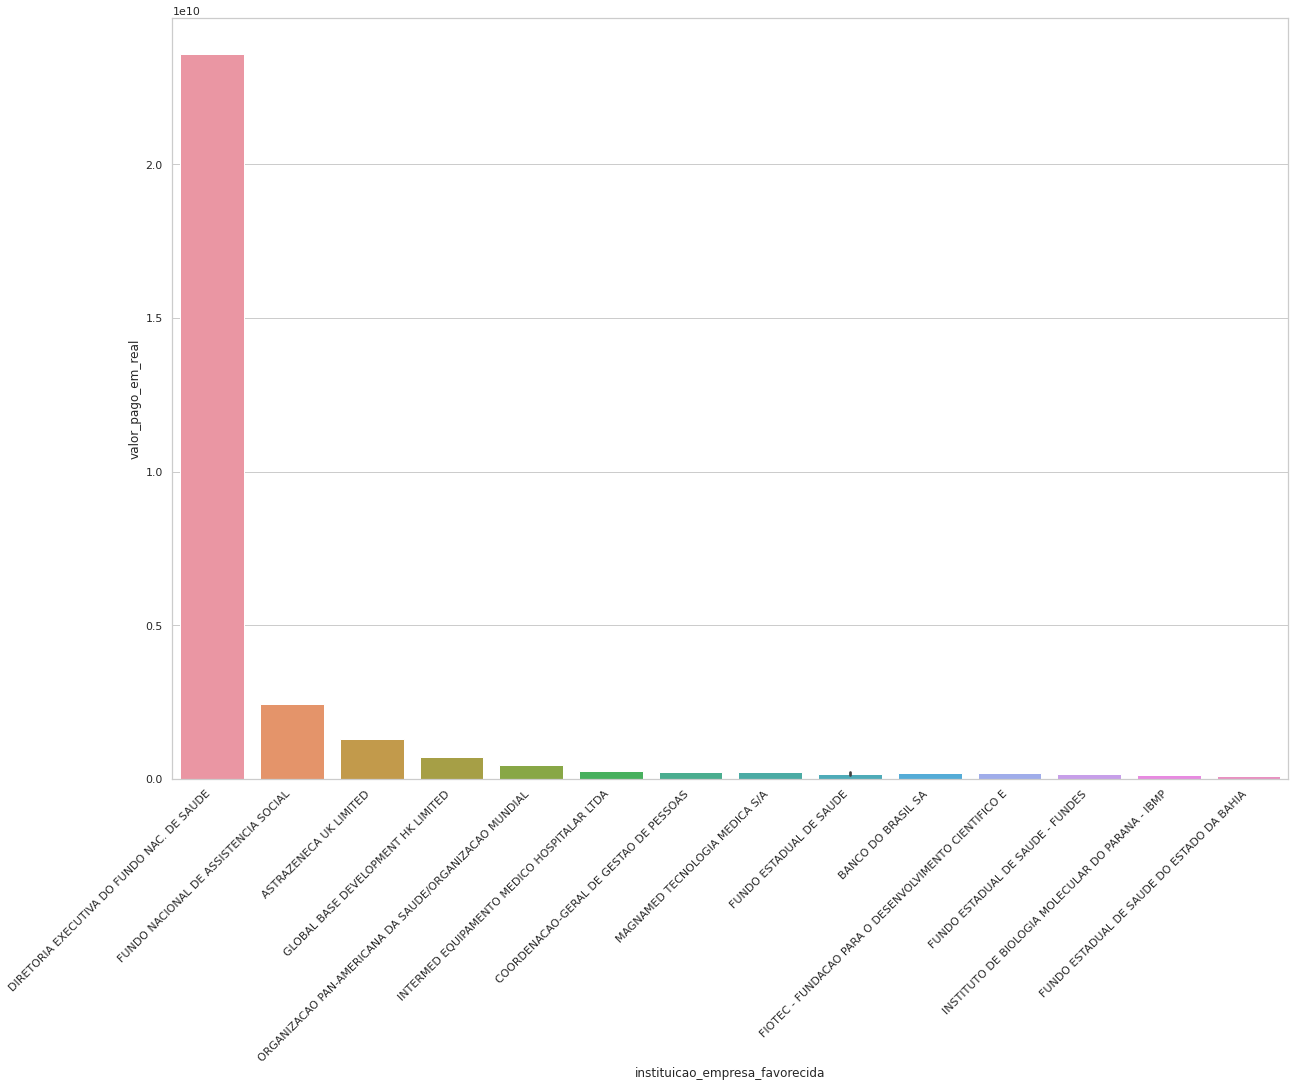

In [76]:
sns.set(style="whitegrid")

fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45, ha='right')

ax = sns.barplot(x="instituicao_empresa_favorecida", y="valor_pago_em_real", data=graf)

In [67]:
# Soma valores em sigilo

In [77]:
sigilo = pagamentos_covid19[(pagamentos_covid19['Favorecido_x'] == 'Informação protegida por sigilo nos termos da legislaçã') |  
                           (pagamentos_covid19['Código Favorecido_x'] == '-11')]

In [78]:
sigilo['valor_pago_em_real'].sum()

2321836.38

In [79]:
# Máximo em sigilo

In [80]:
sigilo.loc[sigilo['valor_pago_em_real'].idxmax()][["Data Emissão_x","Código Empenho", "Id Empenho", "Código Empenho Resumido", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

Data Emissão_x                                                                09/07/2020
Código Empenho                                                   160062000012020NE000088
Id Empenho                                                                     207201212
Código Empenho Resumido                                                     2020NE000088
Órgão_x                                                              Comando do Exército
Unidade Gestora_x                                     CENTRO DE INTELIGENCIA DO EXERCITO
Código Favorecido_x                                                                  -11
Favorecido_x                           Informação protegida por sigilo nos termos da ...
Valor do Empenho Convertido pra R$                                            400,000.00
valor_pago_em_real                                                            400,000.00
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x         

In [81]:
sigilo.to_csv('resultados/graficos/valores_pagos_em_sigilo_covid19_ate_17_setembro_2020.csv', index=False)

In [82]:
# Soma valores por autores de Emenda

In [83]:
emendas = pagamentos_covid19[(pagamentos_covid19['Autor Emenda'] != 'SEM EMENDA')]

In [84]:
emendas['valor_pago_em_real'].sum()

2335334768.91

In [85]:
emendas.groupby(["Autor Emenda"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Autor Emenda,valor_pago_em_real
22,BANCADA DA BAHIA / EMENDA 4,"192,946,250.00"
62,BANCADA DO CEARA / EMENDA 14,"181,066,340.00"
61,BANCADA DO AMAZONAS / EMENDA 5,"116,834,308.00"
42,BANCADA DE SAO PAULO / EMENDA 1,"106,662,280.00"
30,BANCADA DE GOIAS / EMENDA 7,"92,210,658.00"
66,BANCADA DO MARANHAO / EMENDA 3,"81,542,300.00"
63,BANCADA DO DISTRITO FEDERAL / EMENDA 3,"70,825,704.00"
52,BANCADA DE SERGIPE / EMENDA 8,"56,923,875.00"
77,BANCADA DO RIO DE JANEIRO / EMENDA 2,"53,215,190.00"
73,BANCADA DO PARA / EMENDA 4,"53,075,862.00"


In [86]:
# Salva em CSV para gráfico

In [87]:
salva = emendas.groupby(["Autor Emenda"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

In [88]:
salva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 22 to 253
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Autor Emenda        321 non-null    object 
 1   valor_pago_em_real  321 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.5+ KB


In [89]:
salva.to_csv('resultados/graficos/soma_ordenada_emendas_pagamentos_feitos_de_empenhos_covid19_ate_17_setembro_2020.csv', index=False)